<a href="https://colab.research.google.com/github/sumantsharma16/Deep-learning/blob/sumantsharma16-machinelearning/imputing_numerical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv')

In [7]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [9]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [11]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=29)

In [16]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minus1'] = x_train['Age'].fillna(-1)

x_train['Fare_999'] = x_train['Fare'].fillna(999)
x_train['Fare_minus1'] = x_train['Fare'].fillna(-1)

In [17]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after 99 wala imputation: ', x_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', x_train['Age_minus1'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', x_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', x_train['Fare_minus1'].var())

Original Age variable variance:  208.36194841704437
Age Variance after 99 wala imputation:  931.394020570608
Age Variance after -1 wala imputation:  318.86740826636805
Original Fare variable variance:  2665.6328174141468
Fare Variance after 999 wala imputation:  45131.069615502405
Fare Variance after -1 wala imputation:  2587.3330528196825


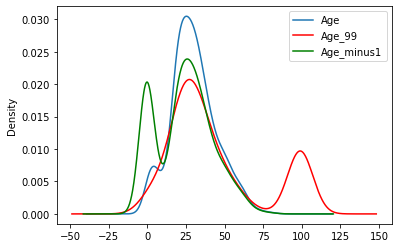

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Age'].plot(kind='kde', ax=ax)

x_train['Age_99'].plot(kind='kde', ax=ax, color='red')

x_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

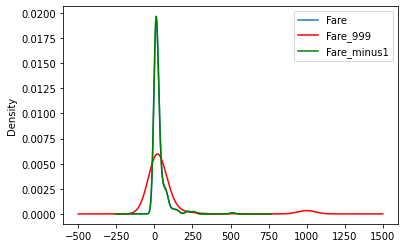

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Fare'].plot(kind='kde', ax=ax)

x_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

x_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus,Fare_minus1
Age,208.361948,55.828631,-6.610128,208.361948,208.361948,148.199791,49.493319,49.493319
Fare,55.828631,2665.632817,16.880770,-93.613780,105.847921,2665.632817,2665.632817,2665.632817
Family,-6.610128,16.880770,2.407574,-7.298908,-4.393916,21.014000,15.905670,15.905670
Age_99,208.361948,-93.613780,-7.298908,931.394021,-174.305117,-180.265951,-86.040892,-86.040892
Age_minus1,208.361948,105.847921,-4.393916,-174.305117,318.867408,251.904713,95.651730,95.651730
Fare_999,148.199791,2665.632817,21.014000,-180.265951,251.904713,45131.069616,1090.984390,1090.984390
Fare_minus,49.493319,2665.632817,15.905670,-86.040892,95.651730,1090.984390,2587.333053,2587.333053
Fare_minus1,49.493319,2665.632817,15.905670,-86.040892,95.651730,1090.984390,2587.333053,2587.333053


In [26]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus,Fare_minus1
Age,1.000000,0.069494,-0.319991,1.000000,1.000000,0.046895,0.062825,0.062825
Fare,0.069494,1.000000,0.209154,-0.059078,0.114604,1.000000,1.000000,1.000000
Family,-0.319991,0.209154,1.000000,-0.154135,-0.158583,0.063750,0.201528,0.201528
Age_99,1.000000,-0.059078,-0.154135,1.000000,-0.319844,-0.027804,-0.055426,-0.055426
Age_minus1,1.000000,0.114604,-0.158583,-0.319844,1.000000,0.066404,0.105308,0.105308
Fare_999,0.046895,1.000000,0.063750,-0.027804,0.066404,1.000000,0.100961,0.100961
Fare_minus,0.062825,1.000000,0.201528,-0.055426,0.105308,0.100961,1.000000,1.000000
Fare_minus1,0.062825,1.000000,0.201528,-0.055426,0.105308,0.100961,1.000000,1.000000


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=39)

In [29]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [30]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [31]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [32]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [33]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [34]:
x_train

,Age,Fare,Family
129,45.0,6.9750,0
793,NaN,30.6958,0
701,35.0,26.2875,0
601,NaN,7.8958,0
344,36.0,13.0000,0
...,...,...,...
582,54.0,26.0000,0
64,NaN,27.7208,0
41,27.0,21.0000,1
105,28.0,7.8958,0
